In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Load the data
prices = pd.read_csv('./data/small_portfolio.csv', index_col='date', parse_dates=True)
# Calculate daily returns
returns = prices.pct_change().dropna()
# Descriptive statistics
descriptive_stats = returns.describe()
descriptive_stats.loc['skew'] = returns.skew()
descriptive_stats.loc['kurt'] = returns.kurtosis()  # excess kurtosis
descriptive_stats.loc['sharpe'] = returns.mean() / returns.std() * 252**0.5
descriptive_stats.loc['sortino'] = returns.mean() / returns[returns < 0].std() * 252**0.5
descriptive_stats.loc['max_dd'] = (1 - (1 + returns).cumprod().div((1 + returns).cumprod().cummax())).max()
descriptive_stats.loc['cagr'] = (1 + returns).cumprod().iloc[-1]**(252/len(returns)) - 1
descriptive_stats.loc['calmar'] = descriptive_stats.loc['cagr'] / descriptive_stats.loc['max_dd']
descriptive_stats.loc['avg_dd'] = (1 - (1 + returns).cumprod().div((1 + returns).cumprod().expanding().max())).mean()
descriptive_stats.loc['avg_dd_days'] = (1 - (1 + returns).cumprod().div((1 + returns).cumprod().expanding().max())).gt(0).sum()
descriptive_stats.loc['avg_dd_days'] = descriptive_stats.loc['avg_dd_days'] / len(returns) * 252
descriptive_stats.loc['avg_dd_days'] = descriptive_stats.loc['avg_dd_days'].round(2)
descriptive_stats

,GE,JPM,MSFT,PG
count,812.000000,812.000000,812.000000,812.000000
mean,-0.000675,0.000769,0.000907,-0.000144
std,0.013563,0.013662,0.014704,0.009087
min,-0.071742,-0.069477,-0.092534,-0.040065
25%,-0.007180,-0.005547,-0.005259,-0.004513
50%,-0.000329,0.000474,0.000368,-0.000124
75%,0.005899,0.007627,0.007289,0.004569
max,0.108045,0.083286,0.104522,0.037104
skew,0.177313,0.018815,0.515431,-0.259934
kurt,7.766370,3.831448,9.882177,2.848092


In [16]:
prices.head(2)

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01


In [17]:
returns.head(2)

,GE,JPM,MSFT,PG
date,,,,
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555


In [18]:
# rebase prices at 100
prices_rebased = prices.div(prices.iloc[0]).mul(100)

In [19]:
prices_rebased.head(2)

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000
2015-01-05,98.164405,96.895503,99.069718,99.524547


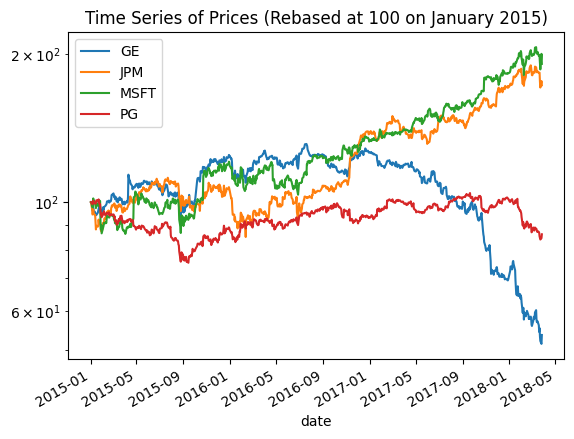

In [20]:
# Plotting time series of prices with log scale
prices_rebased.plot(logy=True)
plt.title('Time Series of Prices (Rebased at 100 on January 2015)')
plt.show()

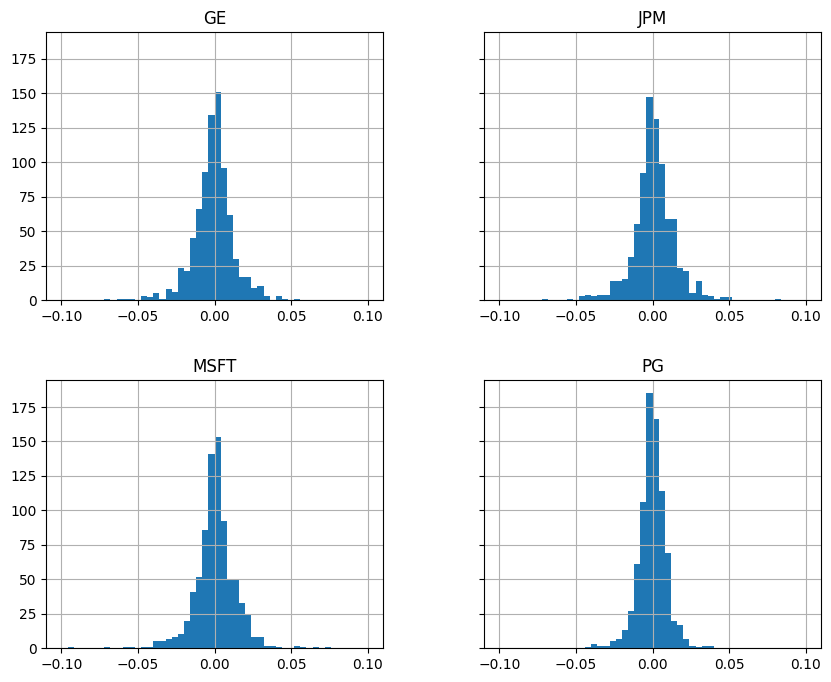

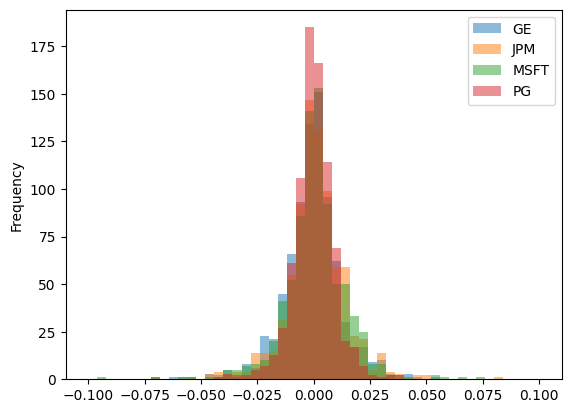

In [21]:
# Histogram of returns
# use the same range for x axis
returns.hist(bins=50, sharey=True, figsize=(10, 8), range=(-0.1, 0.1))
returns.plot.hist(bins=50, alpha=0.5, range=(-0.1, 0.1))
plt.show()

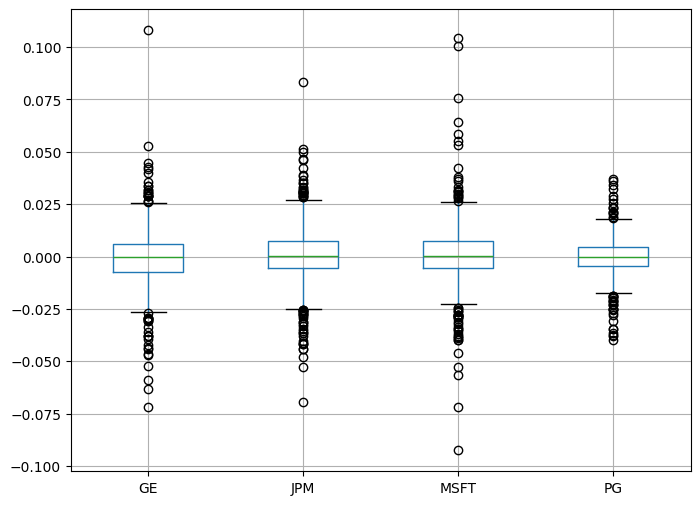

In [22]:
# Box plot of returns
returns.boxplot(figsize=(8, 6))
plt.show()

In [23]:
# Correlation matrix
correlation_matrix = returns.corr().round(2)
print(correlation_matrix)

        GE   JPM  MSFT    PG
GE    1.00  0.49  0.33  0.33
JPM   0.49  1.00  0.48  0.35
MSFT  0.33  0.48  1.00  0.42
PG    0.33  0.35  0.42  1.00
